# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies
import requests
import json
import pandas as pd
import random
from citipy import citipy
from random import uniform
import matplotlib.pyplot as plt
from api_keys import weather_api_key
from scipy.stats import linregress

## Generate Cities List

In [8]:
cities = []
while len(cities)< 550:
    x = uniform(-180,180)
    y = uniform(-90, 90)
    city_code = citipy.nearest_city(x, y)
    city_name = city_code.city_name
    if city_name not in cities:
        cities.append(city_name)

In [ ]:
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# setting up empty lists to create DF
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
df_cities=[]

for index, name in enumerate(cities):
    try:
        response = requests.get(query_url + name).json()
        df_cities.append(response["name"])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"{index+1}/{len(cities)}: Generating data for {name}")
    except:
        print(f"{index+1}/{len(cities)}: Data not found for {name}")

1/550: Generating data for uberaba
2/550: Generating data for torbay
3/550: Generating data for ushuaia
4/550: Generating data for qaanaaq
5/550: Generating data for port alfred
6/550: Generating data for annecy-le-vieux
7/550: Data not found for barentsburg
8/550: Generating data for albany
9/550: Data not found for illoqqortoormiut
10/550: Generating data for longyearbyen
11/550: Data not found for belushya guba
12/550: Generating data for kalmunai
13/550: Generating data for upernavik
14/550: Generating data for lebu
15/550: Generating data for mogadishu
16/550: Generating data for east london
17/550: Generating data for jamestown
18/550: Generating data for hermanus
19/550: Generating data for gaoual
20/550: Generating data for atar
21/550: Data not found for taolanaro
22/550: Generating data for gamba
23/550: Generating data for bredasdorp
24/550: Generating data for malakal
25/550: Generating data for yasnyy
26/550: Generating data for port elizabeth
27/550: Generating data for d

217/550: Generating data for nuevitas
218/550: Generating data for vagur
219/550: Generating data for takoradi
220/550: Generating data for salinas
221/550: Generating data for xai-xai
222/550: Generating data for cap malheureux
223/550: Data not found for spetsai
224/550: Generating data for aasiaat
225/550: Generating data for stralsund
226/550: Generating data for tsybli
227/550: Generating data for praia
228/550: Generating data for marawi
229/550: Generating data for boa vista
230/550: Generating data for hualmay
231/550: Data not found for viligili
232/550: Generating data for baijiantan
233/550: Generating data for tabou
234/550: Generating data for lannion
235/550: Generating data for jipijapa
236/550: Generating data for presidencia roque saenz pena
237/550: Generating data for chandbali
238/550: Generating data for candido de abreu
239/550: Generating data for kibala
240/550: Generating data for joshimath
241/550: Generating data for belmonte
242/550: Generating data for yoka

431/550: Generating data for birjand
432/550: Generating data for suruc
433/550: Generating data for winder
434/550: Generating data for sorland
435/550: Generating data for aravankadu
436/550: Generating data for ambilobe
437/550: Generating data for sabha
438/550: Generating data for cehegin
439/550: Generating data for mach
440/550: Generating data for torez
441/550: Generating data for talnakh
442/550: Generating data for mealhada
443/550: Generating data for lodwar
444/550: Generating data for tabuk
445/550: Generating data for itarema
446/550: Generating data for groton
447/550: Generating data for port-cartier
448/550: Generating data for manta
449/550: Generating data for kruszwica
450/550: Generating data for elizabeth city
451/550: Generating data for ponta delgada
452/550: Generating data for nortelandia
453/550: Generating data for mao
454/550: Generating data for laguna
455/550: Generating data for kaspiysk
456/550: Generating data for boda
457/550: Generating data for par

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_dict = {
    "City": df_cities,
    "Lat": lat,
    "Lng": lng,
    "Max temp": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head(20)

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Uberaba,-19.75,-47.93,27.26,28,0,4.18,BR,1601600103
1,Torbay,47.67,-52.73,16.11,100,90,6.70,CA,1601600161
2,Ushuaia,-54.80,-68.30,-1.00,92,75,9.30,AR,1601600088
3,Qaanaaq,77.48,-69.36,-9.85,79,82,2.24,GL,1601600143
4,Port Alfred,-33.59,26.89,14.30,71,97,9.08,ZA,1601600138
5,Annecy-le-Vieux,45.92,6.14,11.00,100,100,2.10,FR,1601600294
6,Albany,42.60,-73.97,12.78,70,23,1.81,US,1601600137
7,Longyearbyen,78.22,15.64,0.00,95,75,1.00,SJ,1601600109
8,Kalmunai,7.42,81.82,26.07,75,100,1.50,LK,1601600297
9,Upernavik,72.79,-56.15,-5.43,90,0,7.42,GL,1601600138


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
humidity_weather_df = weather_data[weather_data["Humidity"]==100]
print(f"Removing {len(humidity_weather_df)} cities from the DF due to Humidity = 100")

Removing 17 cities from the DF due to Humidity = 100


In [12]:
clean_weather_df = weather_data[weather_data["Humidity"]<100]
clean_weather_df.head()
clean_weather_df.to_csv("../output_data/weather_data.csv",index = False, header = True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [13]:
clean_weather_df.dtypes

City           object
Lat           float64
Lng           float64
Max temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

## Latitude vs. Temperature Plot
This graph is examining if there is a relationship between Latitude and Temperature. 

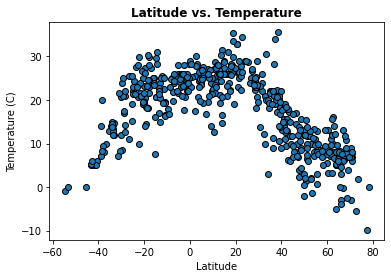

In [14]:
lat = clean_weather_df["Lat"].tolist()
temp = clean_weather_df["Max temp"].tolist()
plt.scatter(lat,temp, marker = "o", edgecolors ="black")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.title("Latitude vs. Temperature", fontweight = "bold")
plt.savefig("../output_data/LatvsTemp.png")

## Latitude vs. Humidity Plot
This graph is examining if there is a relationship between Latitude and Humidity. 

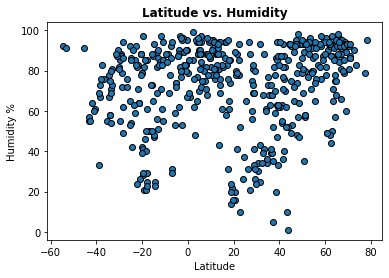

In [15]:
lat = clean_weather_df["Lat"].tolist()
humid = clean_weather_df["Humidity"].tolist()
plt.scatter(lat, humid, marker = "o", edgecolors ="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Latitude vs. Humidity", fontweight = "bold")
plt.savefig("../output_data/LatvsHumidity.png")

## Latitude vs. Cloudiness Plot
This graph is examining if there is a relationship between Latitude and Cloudiness. 

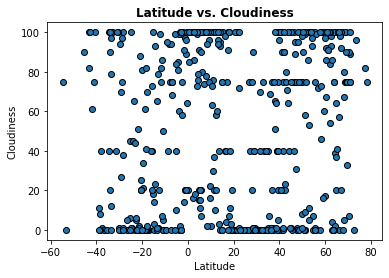

In [16]:
lat = clean_weather_df["Lat"].tolist()
cloud = clean_weather_df["Cloudiness"].tolist()
plt.scatter(lat, cloud, marker = "o", edgecolors ="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness", fontweight = "bold")
plt.savefig("../output_data/LatvsCloud.png")

## Latitude vs. Wind Speed Plot
This graph is examining if there is a relationship between Latitude and Wind Speed. 

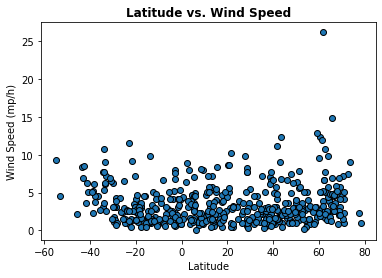

In [17]:
lat = clean_weather_df["Lat"].tolist()
wind = clean_weather_df["Wind Speed"].tolist()
plt.scatter(lat, wind, marker = "o", edgecolors ="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mp/h)")
plt.title("Latitude vs. Wind Speed", fontweight = "bold")
plt.savefig("../output_data/LatvsWind.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
north_df = clean_weather_df[clean_weather_df['Lat']>0]
south_df = clean_weather_df[clean_weather_df['Lat']<0]

In [19]:
x_values = north_df["Lat"]
y_values = north_df["Max temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

The equation is: y = -0.36x + 29.84
The r-squared is: 0.6903794497776368


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
x_values = south_df["Lat"]
y_values = south_df["Max temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

The equation is: y = 0.39x + 27.34
The r-squared is: 0.5142840833767836


### Analysis
There seems to be a reasonable relationship between Latitude and the temperature. Particularly in the Northern hemisphere with the R-Squared value = 0.69, telling us quite a strong correlation exisits.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [21]:
x_values = north_df["Lat"]
y_values = north_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

The equation is: y = 0.13x + 69.32
The r-squared is: 0.017630413847764325


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [22]:
x_values = south_df["Lat"]
y_values = south_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

The equation is: y = 0.21x + 74.79
The r-squared is: 0.017115286469697573


### Analysis
There is little to no correlation between latitude and humidity in either hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [23]:
x_values = north_df["Lat"]
y_values = north_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

The equation is: y = 0.16x + 47.88
The r-squared is: 0.007271338542374678


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [24]:
x_values = south_df["Lat"]
y_values = south_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

The equation is: y = 0.17x + 44.35
The r-squared is: 0.0029569739244015214


### Analysis
There is little to no correlation between latitude and cloudiness in either hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [25]:
x_values = north_df["Lat"]
y_values = north_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

The equation is: y = 0.02x + 2.81
The r-squared is: 0.02066629287687062


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [26]:
x_values = south_df["Lat"]
y_values = south_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

The equation is: y = -0.07x + 2.04
The r-squared is: 0.12387112709588297


### Analysis
There is little to no correlation between latitude and wind speed in either hemisphere.